In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [32]:
import glob

In [4]:
from osgeo import gdal

In [5]:
ds = gdal.Open('..\\Applications\\1985api.tif')

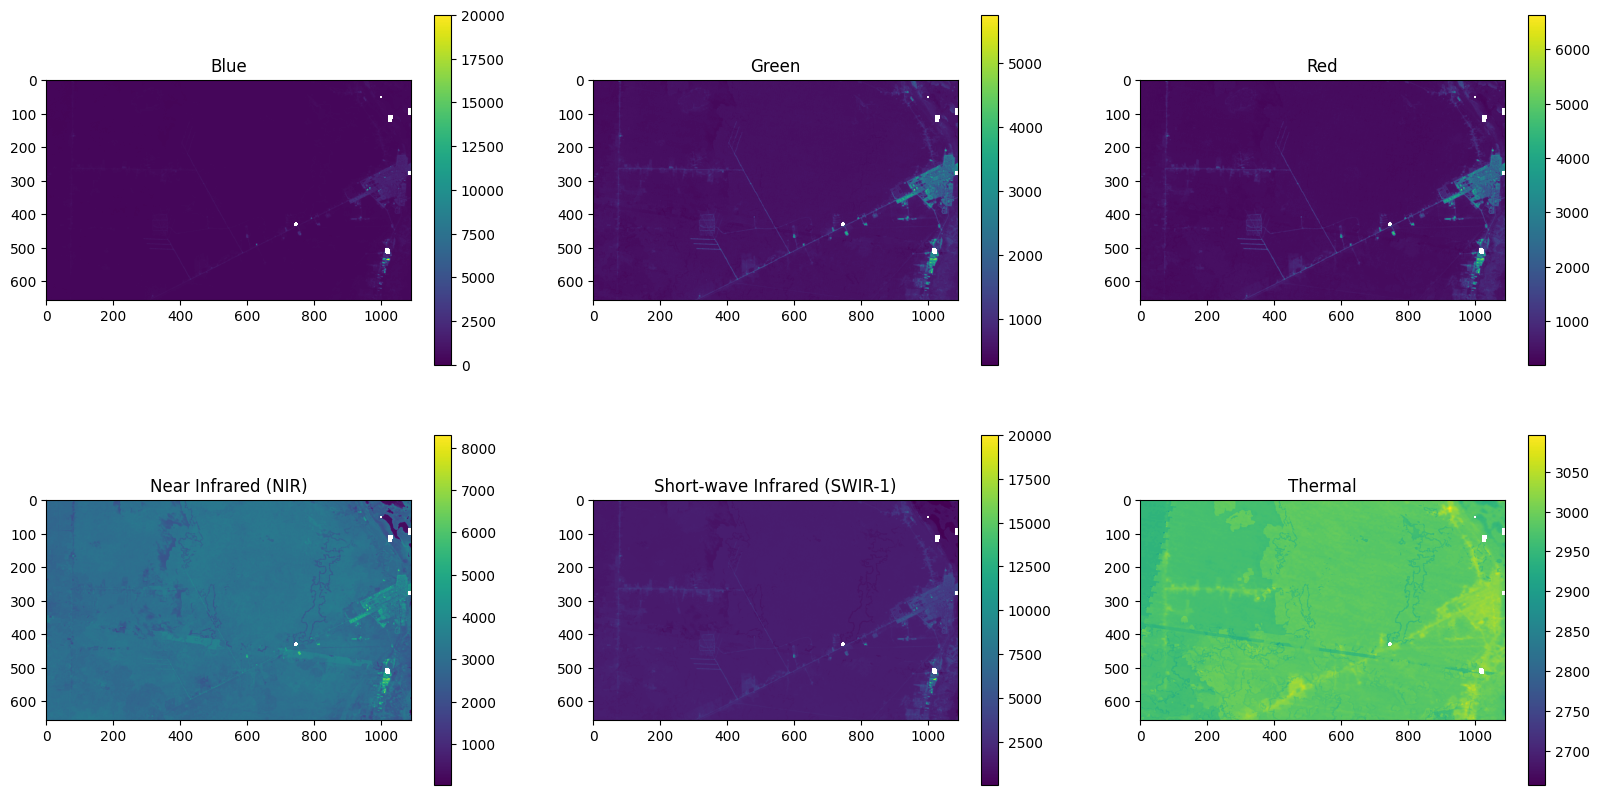

In [7]:
plt.figure(figsize=(20,10))
plt.subplot(231);plt.imshow(ds.GetRasterBand(1).ReadAsArray());plt.title("Blue");plt.colorbar()
plt.subplot(232);plt.imshow(ds.GetRasterBand(2).ReadAsArray());plt.title("Green");plt.colorbar()
plt.subplot(233);plt.imshow(ds.GetRasterBand(3).ReadAsArray());plt.title("Red");plt.colorbar()
plt.subplot(234);plt.imshow(ds.GetRasterBand(4).ReadAsArray());plt.title("Near Infrared (NIR)");plt.colorbar()
plt.subplot(235);plt.imshow(ds.GetRasterBand(5).ReadAsArray());plt.title("Short-wave Infrared (SWIR-1)");plt.colorbar()
plt.subplot(236);plt.imshow(ds.GetRasterBand(6).ReadAsArray());plt.title("Thermal");plt.colorbar()



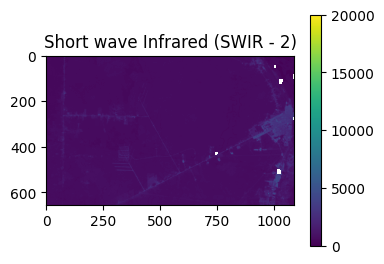

In [11]:
plt.figure(figsize=(4,3))
plt.imshow(ds.GetRasterBand(7).ReadAsArray());plt.title("Short wave Infrared (SWIR - 2)");plt.colorbar()

In [12]:
#Calculating the NDVI

def get_NDVI(ds):
    r = ds.GetRasterBand(3).ReadAsArray()
    nir = ds.GetRasterBand(4).ReadAsArray()
    ndvi = (nir - r)/(nir + r)
    ndvi = normalize255(ndvi)
    return ndvi

In [13]:
def normalize255(ndvi):
    ndvi = ndvi + 1
    ndvi = (ndvi/2)*255
    return ndvi

In [14]:
def get_NDVI_mask(ndvi):
    _,mask = cv2.threshold(ndvi,200,255,cv2.THRESH_BINARY)
    return mask

In [15]:
def percent_green(mask):
    c = cv2.countNonZero(mask)
    t = mask.shape[0] * mask.shape[1]
    return round((c/t)*100,4)

In [16]:
path = '..\\Applications\\1985api.tif'

In [22]:
path.split('\\')[2][:4]

'1985'

In [29]:
def plot_NDVI(path):
    ds = gdal.Open(path)
    ndvi = get_NDVI(ds)
    mask = get_NDVI_mask(ndvi)

    year = path.split('\\')[2][:4]
    fig = plt.figure(figsize=(10,5))
    ax = fig.add_subplot(1,2,1)
    plt.imshow(ndvi,cmap='gray')
    plt.colorbar()
    plt.title("Year :"+year+" NDVI")
    plt.xticks([])
    plt.yticks([])

    ax = fig.add_subplot(1,2,2)
    plt.imshow(mask,cmap='gray')
    plt.title(str(percent_green(mask)) + '%')
    #plt.xticks([])
    #plt.yticks([])
    plt.show()    

    

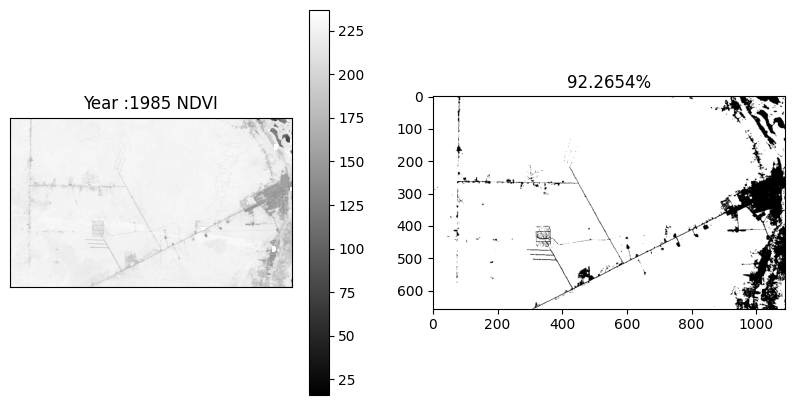

In [30]:
plot_NDVI('..\\Applications\\1985api.tif')

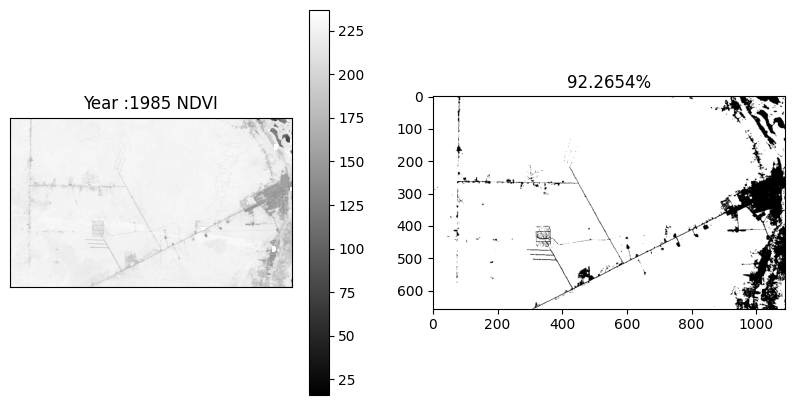

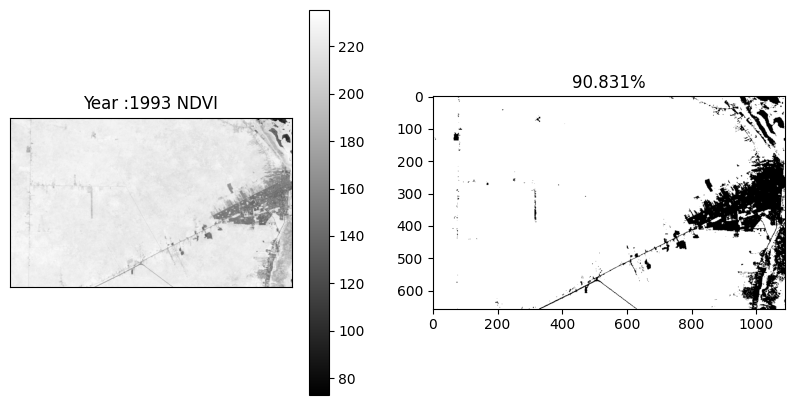

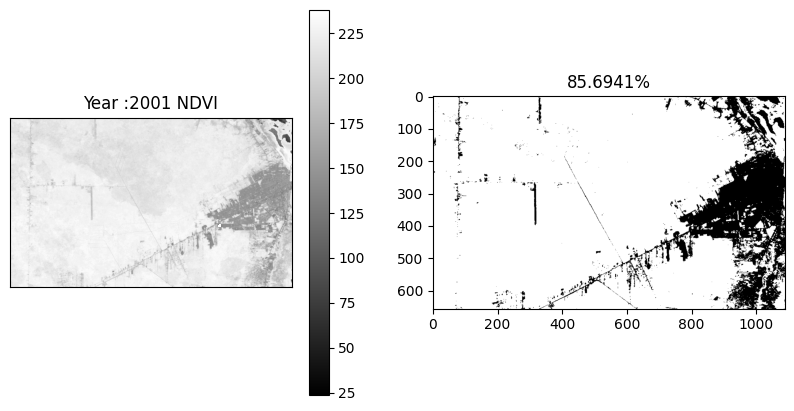

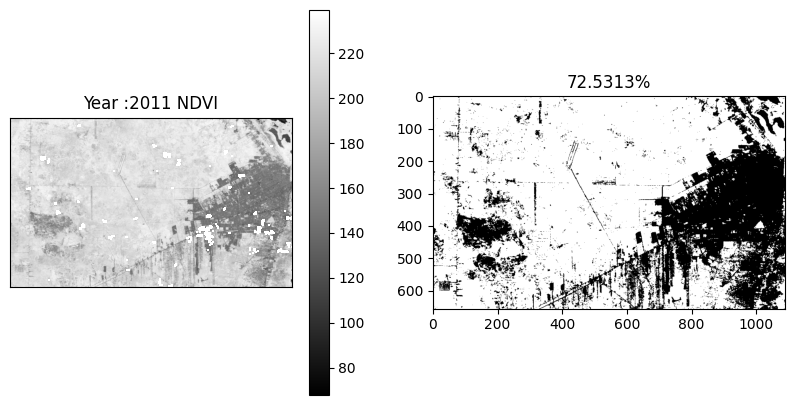

In [33]:
geotiff_files = glob.glob('..\\Applications\\*.tif')
geotiff_files.sort()
for geotiff_file in geotiff_files:
    plot_NDVI(geotiff_file)